# TF-IDF

TF-IDF(Term Frequency-Inverse Document Frequency, 词频-逆文件频率)是一种用于资讯检索与资讯探勘的常用加权技术。
TF-IDF用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。
字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。

上述引用总结就是, 一个词语在一篇文章中出现次数越多, 同时在所有文档中出现次数越少, 越能够代表该文章。这也就是TF-IDF的含义。

# 1.TF

TF(Term Frequency, 词频)表示词条在文本中出现的频率，这个数字通常会被归一化(一般是词频除以文章总词数), 
以防止它偏向长的文件（同一个词语在长文件里可能会比短文件有更高的词频，而不管该词语重要与否）。
TF用公式表示如下：
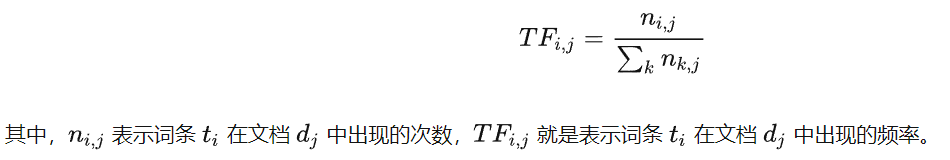
但是，需要注意， 一些通用的词语对于主题并没有太大的作用， 反倒是一些出现频率较少的词才能够表达文章的主题， 所以单纯使用是TF不合适的。权重的设计必须满足：一个词预测主题的能力越强，权重越大，反之，权重越小。所有统计的文章中，一些词只是在其中很少几篇文章中出现，那么这样的词对文章的主题的作用很大，这些词的权重应该设计的较大。IDF就是在完成这样的工作。

# 2.IDF

IDF(Inverse Document Frequency, 逆文件频率)，表示关键词的普遍程度。如果包含词条的文档越少， IDF越大，则说明该词条具有很好的类别区分能力。某一特定词语的IDF，可以由总文件数目除以包含该词语之文件的数目，再将得到的商取对数得到
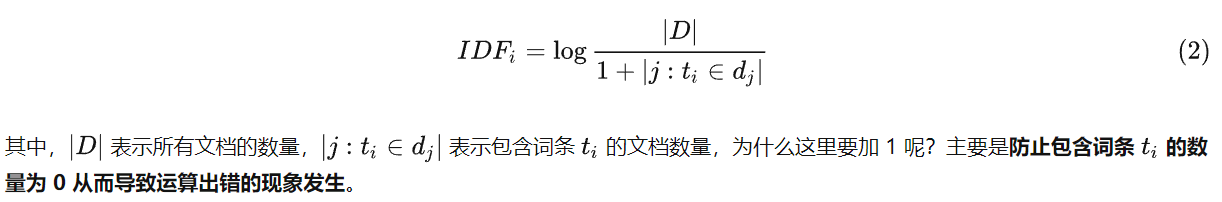

某一特定文件内的高词语频率，以及该词语在整个文件集合中的低文件频率，可以产生出高权重的TF-IDF。因此，TF-IDF倾向于过滤掉常见的词语，保留重要的词语，表达为
# TF-IDF = TF * IDF

# 1TF-IDF的计算示例

In [2]:
#原始的文档数据，三篇英文文档
corpus = ['the first document',
        'the second second document',
        'and the third one']
words_list = list()
for i in range(len(corpus)):
    words_list.append(corpus[i].split(' '))
print(words_list)


[['the', 'first', 'document'], ['the', 'second', 'second', 'document'], ['and', 'the', 'third', 'one']]


In [3]:
#统计每篇文档的词频数据
from collections import Counter
count_list = list()
for i in range(len(words_list)):
    count = Counter(words_list[i])
    count_list.append(count)

#打印每篇文档下的词频统计
print(count_list)

[Counter({'the': 1, 'first': 1, 'document': 1}), Counter({'second': 2, 'the': 1, 'document': 1}), Counter({'and': 1, 'the': 1, 'third': 1, 'one': 1})]


In [5]:
#定义计算tf，idf，tf-idf的函数
import math
def tf(word, count):
    return count[word] / sum(count.values())

def idf(word, count_list):
    n_contain = sum([1 for count in count_list if word in count])
    return math.log(len(count_list) / (1 + n_contain))

def tf_idf(word, count, count_list):
    return tf(word, count) * idf(word, count_list)

In [6]:
#看一下第二篇文档的基本信息
print(corpus[1])
count1 = count_list[1]
print(count1)

the second second document
Counter({'second': 2, 'the': 1, 'document': 1})


In [7]:
#第二篇文档的各个词的tf
print('TF INFO')
for w in count1:
    print(w, ':', tf(w, count1))

TF INFO
the : 0.25
second : 0.5
document : 0.25


In [8]:
#第二篇文档各个词的在三篇文档中的idf
print('IDF INFO')
for w in count1:
    print(w, ':', idf(w, count_list))

IDF INFO
the : -0.2876820724517809
second : 0.4054651081081644
document : 0.0


In [9]:
#输出每篇文档，每个词的tf_idf信息
for i, count in enumerate(count_list):
    print("第 {} 个文档 TF-IDF 统计信息".format(i + 1))
    scores = {word : tf_idf(word, count, count_list) for word in count}
    sorted_word = sorted(scores.items(), key = lambda x : x[1], reverse=True)
    for word, score in sorted_word:
        print("\tword: {}, TF-IDF: {}".format(word, round(score, 5)))

第 1 个文档 TF-IDF 统计信息
	word: first, TF-IDF: 0.13516
	word: document, TF-IDF: 0.0
	word: the, TF-IDF: -0.09589
第 2 个文档 TF-IDF 统计信息
	word: second, TF-IDF: 0.20273
	word: document, TF-IDF: 0.0
	word: the, TF-IDF: -0.07192
第 3 个文档 TF-IDF 统计信息
	word: and, TF-IDF: 0.10137
	word: third, TF-IDF: 0.10137
	word: one, TF-IDF: 0.10137
	word: the, TF-IDF: -0.07192


# 2使用tf-idf对文档进行向量化

In [10]:
#获得所有词
total_words = list()
for ws in words_list:
    total_words.extend(ws)
print('total document words: \n', total_words)
total_counter = Counter(total_words)
print('--------------')
print('total counter\n', total_counter)
word2id = {}
wid = 0
items = total_counter.items()
items = sorted(items, key = lambda x:x[0])

for w, c in items:
    word2id[w] = wid
    wid += 1
print('-------------------')
print('word --> id:')
print(word2id)
print('word count', len(word2id))

total document words: 
 ['the', 'first', 'document', 'the', 'second', 'second', 'document', 'and', 'the', 'third', 'one']
--------------
total counter
 Counter({'the': 3, 'document': 2, 'second': 2, 'first': 1, 'and': 1, 'third': 1, 'one': 1})
-------------------
word --> id:
{'and': 0, 'document': 1, 'first': 2, 'one': 3, 'second': 4, 'the': 5, 'third': 6}
word count 7


In [11]:
#申请3行7列的矩阵
#每一行代表corpus的一篇文章
import numpy as np
doc_count = len(corpus)
word_count = len(word2id)
doc_vec = np.zeros((doc_count, word_count))
print(doc_vec)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [22]:
#遍历每一篇文档，计算文档内每个词的tfidf，然后在doc_vec对应的词位置上设置词的tfidf

for i in range(doc_count):
    doc = corpus[i]
    words = doc.split(' ')
    count = count_list[i]
    
    words_tfidf = {word : tf_idf(word, count, count_list) for word in words}
    for w, score in words_tfidf.items():
        wid = word2id[w]
        doc_vec[i][wid] = score
    #print(doc)
    #print(doc_vec[i])

print(doc_vec)
    

[[ 0.          0.          0.13515504  0.          0.         -0.09589402
   0.        ]
 [ 0.          0.          0.          0.          0.20273255 -0.07192052
   0.        ]
 [ 0.10136628  0.          0.          0.10136628  0.         -0.07192052
   0.10136628]]


# 3使用TfidfVectorizer对文档进行向量化

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
corpus_matrix = tfidf_vec.fit_transform(corpus)

In [24]:
# 得到语料库所有不重复的词
print('total words:')
print(tfidf_vec.get_feature_names_out())
print('')

total words:
['and' 'document' 'first' 'one' 'second' 'the' 'third']



In [25]:
# 得到每个单词对应的id值
print('word->id')
print(tfidf_vec.vocabulary_)
print('')

word->id
{'the': 5, 'first': 2, 'document': 1, 'second': 4, 'and': 0, 'third': 6, 'one': 3}



In [26]:
# 注意：这里计算的得到的向量与手工计算的不完全相同
# 得到每个句子所对应的向量，向量里数字的顺序是按照词语的id顺序来的
print('document->array')
print(corpus_matrix.toarray())

document->array
[[0.         0.54783215 0.72033345 0.         0.         0.42544054
  0.        ]
 [0.         0.34261996 0.         0.         0.90100815 0.26607496
  0.        ]
 [0.54645401 0.         0.         0.54645401 0.         0.32274454
  0.54645401]]


# 测试文档的向量化

In [27]:
doc = 'this is the first document'
tfidf_vec.transform([doc]).toarray()

array([[0.        , 0.54783215, 0.72033345, 0.        , 0.        ,
        0.42544054, 0.        ]])